In [130]:
import pandas as pd
import numpy as np
import torch

In [131]:
df=pd.read_csv('houseprice.csv',usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()

In [132]:
df.shape

(1201, 10)

In [133]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [134]:
#  Saleprice is the dependent feature and we need to predict that

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [136]:
# there are categorical feature as well as continous feature, we will handle categorical feature using embedding
for i in df.columns:
    print("column name {} and unique values is {}".format(i,len(df[i].unique())))

column name MSSubClass and unique values is 15
column name MSZoning and unique values is 5
column name LotFrontage and unique values is 110
column name LotArea and unique values is 869
column name Street and unique values is 2
column name LotShape and unique values is 4
column name YearBuilt and unique values is 112
column name 1stFlrSF and unique values is 678
column name 2ndFlrSF and unique values is 368
column name SalePrice and unique values is 597


In [137]:
import datetime
datetime.datetime.now().year

2023

In [138]:
df["Total Years"]=datetime.datetime.now().year-df['YearBuilt']

In [139]:
# dropping the Year built column
df.drop('YearBuilt',axis=1,inplace=True)

In [140]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total Years'],
      dtype='object')

In [141]:
# taking the cateorical feature

cat_features=["MSSubClass","MSZoning","Street","LotShape"]
out_features="SalePrice"

In [142]:
# converting categorical feature into what model can take, using embedding or encoder
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
lbl_encoders["MSSubClass"]=LabelEncoder()
lbl_encoders["MSSubClass"].fit_transform(df["MSSubClass"])

array([5, 0, 5, ..., 6, 0, 0], dtype=int64)

In [143]:
lbl_encoders={}
for feature in cat_features:
    lbl_encoders[feature]=LabelEncoder()
    df[feature]=lbl_encoders[feature].fit_transform(df[feature])
    

In [144]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,20
1,0,3,80.0,9600,1,3,1262,0,181500,47
2,5,3,68.0,11250,1,0,920,866,223500,22
3,6,3,60.0,9550,1,0,961,756,140000,108
4,5,3,84.0,14260,1,0,1145,1053,250000,23
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,953,694,175000,24
1456,0,3,85.0,13175,1,3,2073,0,210000,45
1457,6,3,66.0,9042,1,3,1188,1152,266500,82
1458,0,3,68.0,9717,1,3,1078,0,142125,73


In [145]:
# converting categorical feature to tensors
cat_features=np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1)

In [146]:
# convert above numpy arrays to tensors
cat_features=torch.tensor(cat_features,dtype=torch.int64)

In [147]:
# lets handle continous values
cont_features=[]
for i in df.columns:
    if i in["MSSubClass","MSZoning","Street","LotShape","SalePrice"]:
        pass
    else:
        cont_features.append(i)

In [148]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [149]:
# convert continous variable into numpy and into torch

cont_values=np.stack([df[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    20.],
        [   80.,  9600.,  1262.,     0.,    47.],
        [   68., 11250.,   920.,   866.,    22.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    82.],
        [   68.,  9717.,  1078.,     0.,    73.],
        [   75.,  9937.,  1256.,     0.,    58.]])

In [150]:
# converting dependent feature which is salesprice as tensors
y=torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1)


In [151]:
cat_features.shape,cont_values.shape,y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [152]:
# apply embedding
# embedding for categorical feature

len(df['MSSubClass'].unique())

15

In [153]:
cat_dims=[len(df[col].unique()) for col in ['MSSubClass', 'MSZoning','Street','LotShape']]

In [154]:
# this is the input dimension
cat_dims

[15, 5, 2, 4]

In [155]:
# rule
# output dimensions should be set based on input dimensions(min(50,featuredimension/2))
embedding_dim=[(x, min(50,(x+1)//2)) for x in cat_dims]

In [156]:
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [157]:
# Now we can create an embedding layer
#module list helps create multiple embedding layer depending on dimension
import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp, out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [158]:
cat_featurez=cat_features[:4]

In [159]:
cat_featurez

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [160]:
#converting categorical features to vector depending on the embedded layer created

pd.set_option('display.max_rows', 500)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))

In [161]:
embedding_val

[tensor([[-1.9793, -0.0901, -0.8985,  ..., -0.7198, -1.2037,  0.3494],
         [ 0.3159,  0.5459, -2.0745,  ..., -1.5762, -0.7999, -1.1375],
         [-1.9793, -0.0901, -0.8985,  ..., -0.7198, -1.2037,  0.3494],
         ...,
         [-0.4923, -0.4153, -0.8417,  ..., -1.0691,  0.3482,  1.8118],
         [ 0.3159,  0.5459, -2.0745,  ..., -1.5762, -0.7999, -1.1375],
         [ 0.3159,  0.5459, -2.0745,  ..., -1.5762, -0.7999, -1.1375]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[ 1.3749, -0.3629,  0.0708],
         [ 1.3749, -0.3629,  0.0708],
         [ 1.3749, -0.3629,  0.0708],
         ...,
         [ 1.3749, -0.3629,  0.0708],
         [ 1.3749, -0.3629,  0.0708],
         [ 1.3749, -0.3629,  0.0708]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.2052],
         [-0.2052],
         [-0.2052],
         ...,
         [-0.2052],
         [-0.2052],
         [-0.2052]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.9169, -0.6593],
         [ 0.9169, -0.6593],
         [ 1.0195,  0.

In [162]:
#stacked to one line
z=torch.cat(embedding_val,1)

In [163]:
#implement dropout
dropout=nn.Dropout(.4)

In [164]:
final_embed=dropout(z)
final_embed

tensor([[-3.2988, -0.0000, -1.4975,  ..., -0.3420,  0.0000, -0.0000],
        [ 0.0000,  0.9098, -0.0000,  ..., -0.3420,  1.5282, -1.0989],
        [-0.0000, -0.1502, -1.4975,  ..., -0.3420,  1.6992,  0.0000],
        ...,
        [-0.8205, -0.6922, -1.4028,  ..., -0.3420,  0.0000, -1.0989],
        [ 0.0000,  0.9098, -0.0000,  ..., -0.3420,  1.5282, -1.0989],
        [ 0.5265,  0.9098, -0.0000,  ..., -0.0000,  1.5282, -0.0000]],
       grad_fn=<MulBackward0>)

In [165]:
#create a feed forward neural network
class Feedforward(nn.Module):

    def __init__(self,embedding_dim,n_cont,out_sz,layers,p=0.5):
        super().__init__()
        self.embeds=nn.ModuleList([nn.Embedding(inp,out)for inp,out in embedding_dim ])
        self.emb_drop=nn.Dropout(p)
        self.bn_cont=nn.BatchNorm1d(n_cont)

        layer_list=[]
        n_emb=sum(out for inp,out in embedding_dim)
        n_in=n_emb+n_cont

        for i in layers:
            layer_list.append(nn.Linear(n_in,i))
            layer_list.append(nn.ReLU(inplace=True))
            layer_list.append(nn.BatchNorm1d(i))
            layer_list.append(nn.Dropout(p))
            n_in=i
        layer_list.append(nn.Linear(layers[-1],out_sz))

        self.layers = nn.Sequential(*layer_list)


    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x



In [166]:
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [167]:
torch.manual_seed(100)
model=Feedforward(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [168]:
model

Feedforward(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [169]:
# define loss and optimizer
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [170]:
cont_values


tensor([[   65.,  8450.,   856.,   854.,    20.],
        [   80.,  9600.,  1262.,     0.,    47.],
        [   68., 11250.,   920.,   866.,    22.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    82.],
        [   68.,  9717.,  1078.,     0.,    73.],
        [   75.,  9937.,  1256.,     0.,    58.]])

In [172]:
batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=cat_features[:batch_size-test_size]
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [174]:
epochs=5000
final_losses=[]
for i in range (epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train))
    final_losses.append(loss)
    if i%10==1:
        print('epoch number: {} and the loss :{}'.format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch number: 1 and the loss :164278.03125
epoch number: 11 and the loss :163885.75
epoch number: 21 and the loss :163564.203125
epoch number: 31 and the loss :163098.515625
epoch number: 41 and the loss :162247.25
epoch number: 51 and the loss :162054.765625
epoch number: 61 and the loss :161423.1875
epoch number: 71 and the loss :161929.765625
epoch number: 81 and the loss :160400.375
epoch number: 91 and the loss :160168.71875
epoch number: 101 and the loss :160007.578125
epoch number: 111 and the loss :160023.203125
epoch number: 121 and the loss :159575.921875
epoch number: 131 and the loss :158715.8125
epoch number: 141 and the loss :158491.28125
epoch number: 151 and the loss :157920.4375
epoch number: 161 and the loss :157946.515625
epoch number: 171 and the loss :156973.046875
epoch number: 181 and the loss :156027.25
epoch number: 191 and the loss :155835.953125
epoch number: 201 and the loss :155312.53125
epoch number: 211 and the loss :154857.5
epoch number: 221 and the los

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

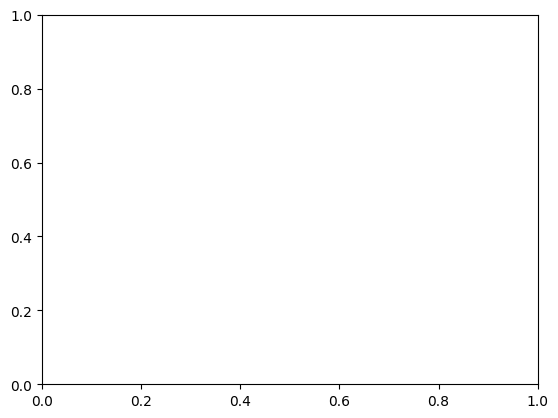

In [175]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch')

In [176]:
#### Validate the Test Data
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 49106.05859375


In [177]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [178]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [179]:
data_predicted


,Prediction
0,85789.500000
1,221865.109375
2,129510.210938
3,354725.437500
4,164656.859375
5,188982.546875
6,197832.750000
7,324087.000000
8,159888.265625
9,407639.093750


In [180]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,85789.500000,44210.500000
1,138887.0,221865.109375,-82978.109375
2,175500.0,129510.210938,45989.789062
3,195000.0,354725.437500,-159725.437500
4,142500.0,164656.859375,-22156.859375
